### El siguiente documento se encuentra en español en función de facilitar una descripción en profundidad.

In [2]:
#Librerías utilizadas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Data:
Life = pd.read_csv('Life Expectancy Data.csv')
Life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#Se actualiza los nombres de las columnas pues existen espacios antes o entre las palabras que dificultan su llamado.
Life.columns=['Country','Year','Status','Life Expectancy','Adult Mortality','Infant Deaths','Alcohol','Percentage Expenditure','Hepatitis B','Measles','BMI','Under-five Deaths','Polio','Total Expenditure','Diphtheria','HIV/AIDS','GDP','Population','Thinness 10-19 Years','Thinness 5-9 Years','Income Composition of Resources','Shooling']

### Elementos Nulos:

In [5]:
print(Life.isnull().any())

Country                            False
Year                               False
Status                             False
Life Expectancy                     True
Adult Mortality                     True
Infant Deaths                      False
Alcohol                             True
Percentage Expenditure             False
Hepatitis B                         True
Measles                            False
BMI                                 True
Under-five Deaths                  False
Polio                               True
Total Expenditure                   True
Diphtheria                          True
HIV/AIDS                           False
GDP                                 True
Population                          True
Thinness 10-19 Years                True
Thinness 5-9 Years                  True
Income Composition of Resources     True
Shooling                            True
dtype: bool


In [6]:
print(Life.isnull().sum()/Life.shape[0])

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life Expectancy                    0.003404
Adult Mortality                    0.003404
Infant Deaths                      0.000000
Alcohol                            0.066031
Percentage Expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
BMI                                0.011572
Under-five Deaths                  0.000000
Polio                              0.006467
Total Expenditure                  0.076923
Diphtheria                         0.006467
HIV/AIDS                           0.000000
GDP                                0.152485
Population                         0.221920
Thinness 10-19 Years               0.011572
Thinness 5-9 Years                 0.011572
Income Composition of Resources    0.056841
Shooling                           0.055480
dtype: float64


In [7]:
#Dado los  porcentajes de datos nulos en comparación a la muestras inferiores a 22%, estos valores serán eliminados.
Life = Life.dropna()
print(Life.isnull().any())

Country                            False
Year                               False
Status                             False
Life Expectancy                    False
Adult Mortality                    False
Infant Deaths                      False
Alcohol                            False
Percentage Expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
Under-five Deaths                  False
Polio                              False
Total Expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
Thinness 10-19 Years               False
Thinness 5-9 Years                 False
Income Composition of Resources    False
Shooling                           False
dtype: bool


### Descripción de la data:

In [8]:
Life.dtypes #No se observan inconvenientes en el formato de la data.

Country                             object
Year                                 int64
Status                              object
Life Expectancy                    float64
Adult Mortality                    float64
Infant Deaths                        int64
Alcohol                            float64
Percentage Expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
Under-five Deaths                    int64
Polio                              float64
Total Expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness 10-19 Years               float64
Thinness 5-9 Years                 float64
Income Composition of Resources    float64
Shooling                           float64
dtype: object

La data dispone de 22 columnas con las siguientes descripciones, de estas 8 no pueden ser analizadas dado que el rango de sus valores no coinciden con la descripciones (estos errores pese a no representar un gran porcentaje, este error en comparación a la falta de datos pone en duda la validez de los datos, por esto en el análisis posterior estas columnas no serán consideradas).

'Country': Países (193 valores únicos).
'Year': Periodo de la toma de datos.
'Status': Nivel de desarrollo del país (Desarrollado/En Desarrollo).
'Life Expectancy': Expectativa de vida en edad. Rango: (36,3-89).
'Adult Mortality': Probabilidad de morir entre los 15 y 60 año cada 1000 personas (sin distinción de sexo). Rango: (1-723) entre 1000.
'Infant Deaths': Número de muertes de infantes por cada 1000 personas. Rango: (0-1800) entre 1000. *PROBLEMA
'Alcohol': Consumo per cápita (mayores de 15 años) en litros de alcohol puro. Rango: (0.01-17.9).
'Percentage Expenditure': Gasto del PIB en salud per cápita (%). Rango: (4,67-19.5k) *PROBLEMA
'Hepatitis B': Cobertura de vacunación contra la hepatitis B entre niños de 1 año (%). Rango: (1-97).
'Measles': Números de casos notificados de sarampión cada 1000 habitantes. Rango: (17-212k). *PROBLEMA.
'BMI': Índice de masa corporal promedio del país. Rango: (1-87.3) *PROBLEMA.
'Under-five Deaths': Muertes de menores de 5 años por cada 1000 habitantes. Rango: (0-2500). *PROBLEMA.
'Polio': Cobertura de vacunación contra la poliomielitis en niños de 1 año (%). Rango: (3-99).
'Total Expenditure': Gasto del gobierno en salud (%). Rango: (0,37 a 17,6).*PROBLEMA.
'Diphtheria': Cobertura de inmunización con toxoide diftérico, tétanos, y tos ferina en niños de 1 año (%). Rango: (2-99).
'HIV/AIDS': Muertes infantiles por VIH/SIDA cada 1000 nacidos (0-4 años). Rango: (0,1-50,6).
'GDP': Producto Interno Bruto per cápita (¿Millones? USD). Rango: (1.68 -119k).
'Population': Población. Rango: (34-1,29b) *PROBLEMA.
'Thinness 10-19 Years': Prevalencia de delgadez en niños y adolecentes de 10 a 19 años (%). Rango: (0,1-27,7).
'Thinness 5-9 Years': Prevalencia de delgadez en niños de 5 a 9 años (%). Rango: (0,1-28,6).
'Income Composition of Resources': Índice de Desarrollo Humano en términos de composición de ingresos de los recursos. Rango: (0 - 0,95)
'Shooling': Número de años de escolaridad. Rango: (0-20,7). (No lo menciona pero se supone que es el promedio).

In [10]:
#Se actualiza la data eliminando las columnas con problemas.
Life = Life[['Life Expectancy','Status','Adult Mortality','Alcohol','Hepatitis B','Polio','Diphtheria','HIV/AIDS','GDP','Thinness 10-19 Years','Thinness 5-9 Years','Income Composition of Resources','Shooling']]
Life.head()

,Life Expectancy,Status,Adult Mortality,Alcohol,Hepatitis B,Polio,Diphtheria,HIV/AIDS,GDP,Thinness 10-19 Years,Thinness 5-9 Years,Income Composition of Resources,Shooling
0,65.0,Developing,263.0,0.01,65.0,6.0,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,59.9,Developing,271.0,0.01,62.0,58.0,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,59.9,Developing,268.0,0.01,64.0,62.0,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,59.5,Developing,272.0,0.01,67.0,67.0,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,59.2,Developing,275.0,0.01,68.0,68.0,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


### Elección del Modelo:

<AxesSubplot:>

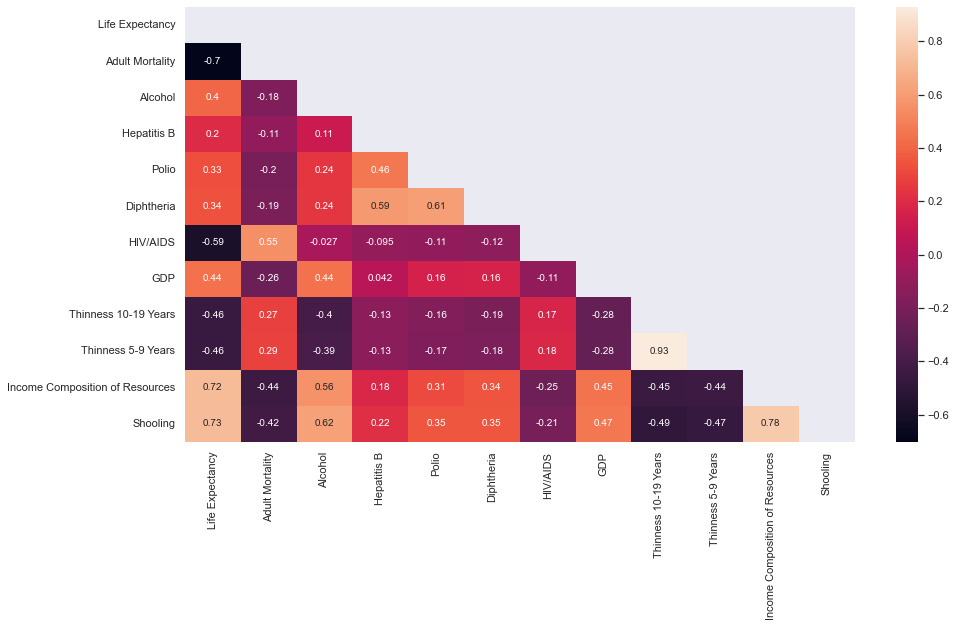

In [11]:
# A continuación se realizó un análisis de la correlación entre las variables para evitar la elección de variables que 
# probablemente afectan de igual forma la variable dependiente ('Life Expectancy').
upp_mat = np.triu(Life.corr())
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Life.corr(), annot=True, annot_kws={'size':10}, mask = upp_mat) 

De estas varibles las que son de interes a analizar son Income Composition of Resources y Thinness 5-9 years, la razón de tras de esta decisión se debe a 2 razones: 

En primer lugar ambas variables son factores que se consideran determinantes en la expectativa de vida, el primero teniendo relación con el desarrollo economico del país (su crecimiento) y el segundo la salud de las personas considerando la relevancia del desarrollo de las personas en su infancía.

Por otra parte las variables Shooling y Thinness 10-19 Years también podrían ser usadas debido a esta razón pero como se menciono anteriormente la correlación entre estas variables y las anteriormente presentadas nos indican que esto no es adecuado.

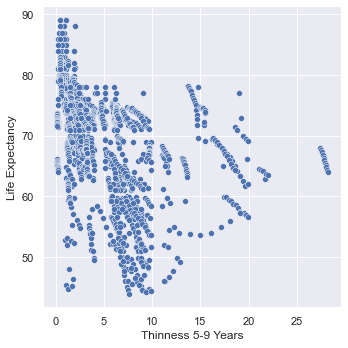

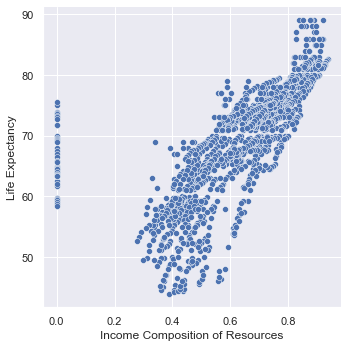

In [12]:
# La correlación entre estas variables y Life Expectancy se pueden visualizar a continuación,donde Thinness 5-9 Years posee 
# una relación negativa y Income Composition of Resources una positiva.
sns.relplot(x="Thinness 5-9 Years", y="Life Expectancy", data=Life); 
sns.relplot(x="Income Composition of Resources", y="Life Expectancy", data=Life)

### PyStan:

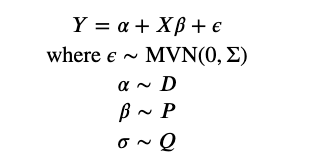

In [13]:
# La distribución bajo la que se modelará la regresión lineal de 2 variables es normal. 
import IPython.display as display
from PIL import Image
display.display(Image.open('Distribución.png'))

In [14]:
#Librería:
import pystan
import scipy.stats as stats

In [15]:
# Modelo:
Life_code = """
data {
    int N;
    real Life[N];
    real IDH[N];
    real Thinness[N];
}
parameters {
    real b0;
    real b1;
    real b2;
    real<lower=0> sigma;
}
model {
    for (i in 1:N)
        Life[i] ~ normal(b0 + b1 * IDH[i] + b2* Thinness[i], sigma);
}"""

El siguiente modelo se compone de tres partes: data, parametros y el modelos. La primera parte entrega al modelo los datos de entrada tanto para las variables independientes como las dependientes, la segunda parte son los valores que deseamos estimar, en este caso nos interesa estimar los valores de intersección (b0) y las pendientes (b1,b2) de las varibles, en conjunto con el valor de sigma. Finalmente en tercer lugar se define el modelo bajo el cual se estimarán los parametros.

In [16]:
# Considerando que solo se esta trabajando bajo un modelo lineal con 2 variables la data se actualiza y se fitea el modelo 
# anteriormente presentado considerando el estandar de N=1000.
data = {'N':Life.shape[0], 'Life': Life['Life Expectancy'], 'IDH':Life['Income Composition of Resources'], 'Thinness':Life['Thinness 5-9 Years']}
fit = pystan.stan(model_code=Life_code, data=data, iter=1000, chains=1) #Chains?

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f66f51d54e8b17788744bd790fa12d25 NOW.


In [17]:
print(fit)

Inference for Stan model: anon_model_f66f51d54e8b17788744bd790fa12d25.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b0     51.51    0.06   0.67  50.12  51.04  51.51  51.95  52.89    128    1.0
b1      30.8    0.08   0.91  28.96   30.2  30.81   31.4  32.53    117    1.0
b2     -0.33  2.2e-3   0.03   -0.4  -0.36  -0.33  -0.31  -0.27    242    1.0
sigma   5.94  4.8e-3    0.1   5.74   5.87   5.94   6.02   6.13    435   1.01
lp__   -3761    0.09   1.39  -3764  -3761  -3760  -3760  -3759    235    1.0

Samples were drawn using NUTS at Thu Apr 28 22:12:51 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [ ]:
Fuentes bibliograficas utilizadas:
    https://www.delftstack.com/es/howto/seaborn/correlation-heatplot-seaborn-python/ (Gráfico de correlación)
    https://www.youtube.com/watch?v=UQtFkEOg9SM&list=PLdJOurH5zUivS67JsZ_GkTFHwZqUCdquD&index=50&ab_channel=Stan
    https://aidanrussellcom.wordpress.com/2019/01/14/pystan-tutorial-1/